## Importing Modules

In [196]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Input Data

In [197]:
# Input the data set
df = pd.read_csv("50_Startups.csv")
#df

##In case you want to view data plots un-comment the following lines
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
#fig.figsize = (10, 10)
#ax[0, 0].scatter(df['Profit'], df['R&D Spend'],color = 'red')
#ax[0, 1].scatter(df['Profit'], df['Administration'],color = 'yellow')
#ax[1, 0].scatter(df['Profit'], df['Marketing Spend'], color ='green')
#ax[1, 1].scatter(df['Profit'], df['State'],color = 'blue')
#plt.tight_layout()

## Define features and labels

In [198]:
# Define features and labels
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


## Converting text into columns

In [199]:
# Convert text data to numbers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


## Scaling Dataset

In [200]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


## Separating training and testing data

In [201]:
# Separate the dataset into training and testing## Define features and labels
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3,random_state=42)


## Implementing the logic for cost function and gradient descent function

In [202]:
# Creating the cost and gradient function
#calculate cost
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [203]:
#Gradient Descent
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

## Calculating weights and bias

In [204]:
# Calculating weights and bias
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.01,epochs=5500)
#38791988.606615104 is lowest cost achieved

Cost is: 6862024968.763736
Cost is: 54828246.86923076
Cost is: 42193865.438796364
Cost is: 40921361.35124761
Cost is: 40792278.51359628
Cost is: 40779184.32760187
Cost is: 40777856.05104652
Cost is: 40777721.31043658
Cost is: 40777707.64232514
Cost is: 40777706.25582949


## Plotting the cost function

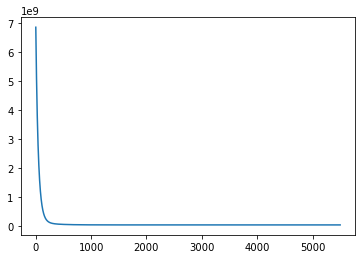

In [205]:
# Plotting the cost
plt.plot(c)

## Predicting values

In [206]:
# Predicting labels with the calculated weights and biases
def predict(X, w, b):
    return X.dot(w) + b

In [207]:
y_pred = predict(Xtest, w, b)

## Calculating accuracy

In [208]:
# Calculating the r² accuracy of our model
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

In [209]:
r2score(y_pred, Ytest)

0.939710893315253